In [54]:
import pandas as pd


In [55]:
df_raw = pd.read_excel(
    "../data/sh_ipi_manufacturero_2025.xls",
    sheet_name=1,
    header=None
)

df_raw.head(20)



,0,1,2,3,4,5,6,7,8,9,10,11
0,Cuadro 1. IPI manufacturero nivel general. Ser...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Período,NaN,NaN,Serie original,NaN,NaN,NaN,Serie desestacionalizada (1),NaN,NaN,Serie tendencia-ciclo,NaN
4,NaN,NaN,NaN,Nivel general,Variación porcentual,NaN,NaN,Nivel general,Variación porcentual respecto al mes anterior,NaN,Nivel general,Variación porcentual respecto al mes anterior
5,NaN,NaN,NaN,NaN,respecto al mismo mes del año anterior,acumulada del año respecto a igual acumulado d...,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Números índice,%,NaN,NaN,Números índice,%,NaN,Números índice,%
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2016,Enero,117.051194,///,///,NaN,134.489891,///,NaN,132.8319,///
9,NaN,NaN,Febrero,118.900294,///,///,NaN,132.394362,-1.558131,NaN,132.018226,-0.612559


In [56]:
df = df_raw.iloc[8:, [1, 2, 3]]
df.columns = ["year", "month", "ipi"]

df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["year"] = df["year"].ffill()


In [57]:
df.head(15)
df["month"].value_counts().sort_index()


Abril         10
Agosto        10
Diciembre      9
Enero         10
Febrero       10
Julio         10
Junio         10
Marzo         10
Mayo          10
Noviembre      9
Octubre       10
Septiembre    10
Name: month, dtype: int64

In [58]:
month_map = {
    "Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4,
    "Mayo": 5, "Junio": 6, "Julio": 7, "Agosto": 8,
    "Septiembre": 9, "Octubre": 10, "Noviembre": 11, "Diciembre": 12
}

df["month_num"] = df["month"].map(month_map)


In [59]:
df = df.dropna(subset=["month_num"])


In [60]:
df["date"] = pd.to_datetime(
    df["year"].astype(int).astype(str) + "-" +
    df["month_num"].astype(int).astype(str) + "-01"
)

df = df[["date", "ipi"]].sort_values("date")
df.head(15)


,date,ipi
8,2016-01-01,117.051194
9,2016-02-01,118.900294
10,2016-03-01,136.80623
11,2016-04-01,132.069649
12,2016-05-01,132.12673
13,2016-06-01,124.991651
14,2016-07-01,126.761474
15,2016-08-01,133.732983
16,2016-09-01,135.517892
17,2016-10-01,133.341141


In [61]:
df = df.drop_duplicates(subset=["date"], keep="last")


In [62]:
df = df.set_index("date").asfreq("MS").reset_index()


In [63]:
df["ipi"] = pd.to_numeric(df["ipi"], errors="coerce")
df = df.dropna()

df["ipi_yoy"] = df["ipi"].pct_change(12) * 100
df.tail(12)


,date,ipi,ipi_yoy
72,2022-01-01,110.452239,-1.181397
73,2022-02-01,103.660817,-3.798444
74,2022-03-01,136.064180,3.355159
75,2022-04-01,133.353504,6.240114
76,2022-05-01,135.956234,11.728878
77,2022-06-01,107.022057,-16.778063
78,2022-07-01,132.371648,1.008301
79,2022-08-01,128.795405,-3.160471
80,2022-09-01,133.619889,0.614297
81,2022-10-01,126.595823,-2.642291


In [64]:
df["date"].diff().value_counts().head()


31 days    48
30 days    28
28 days     5
29 days     2
Name: date, dtype: int64

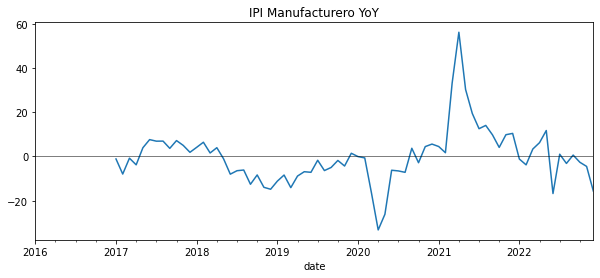

In [65]:
import matplotlib.pyplot as plt

df.set_index("date")["ipi_yoy"].plot(figsize=(10,4))
plt.title("IPI Manufacturero YoY")
plt.axhline(0, color="black", linewidth=0.5)
plt.show()


In [66]:
df["ipi_yoy"].notna().sum() > 0


True

In [67]:
df.to_csv("../data/ipi_yoy.csv", index=False)    # en IPI